In [9]:
import numpy as np
import os

def true_t2obs_t(true_t, x, W_I, W_C):

    obs_t = true_t + (W_C*x[:,10:]**2).mean(axis=1,keepdims = True) + (W_I*x[:,:5]).mean(axis=1,keepdims = True)

    for i in range(true_t.shape[1]):
        obs_t[:, i] += 0.5*(true_t[:, i])**3 * ((x[:, x.shape[1] - i - 1]))

    return obs_t

def obs_t2y(obs_t, x, W_T):

    # nonlinear
    y = np.zeros((x.shape[0], 1))
    y[:, 0] += 0.5*np.abs(W_T*obs_t).sum(axis=1)

    return y

def x2y(t,x,W_C,W_A):
    # nonlinear
    y = 0.5*(W_A*x[:,5:10]**2).sum(axis=1,keepdims=True) + 1.0*(W_C*x[:,10:]).sum(axis=1,keepdims=True) 
    return y

def tx2y(obs_t, x,W_C,W_A,W_T):
    y = obs_t2y(obs_t, x,W_T)+ x2y(obs_t,x,W_C,W_A)
    for i in range(obs_t.shape[1]):
        y[:,0] += 0.5*(obs_t[:, i]) * ((x[:, x.shape[1] - i - 10]))


    return y

def simulate_train(n_samples, W_I, W_C, W_A, W_T, x_dim, t_dim):
    # setup_seed(0)
    # 确认x的分布
    x = np.random.normal(0.0, 1.0, (n_samples,x_dim))

    true_t = np.random.normal(0.0,1.0, (n_samples, t_dim))

    y = np.random.normal(0.0,1.0, (n_samples, 1))

    observed_t = true_t2obs_t(true_t, x, W_I,W_C)
    # print(observed_t.shape)
    y =  tx2y(observed_t, x, W_C,W_A,W_T) + y
    return observed_t, x, y

def simulate_test(test_samples, test_t_nums, x_dim, t_dim,  W_I, W_C, W_A, W_T):
    x = np.random.normal(0.0, 1.0, (test_samples,x_dim))

    test_true_ts = np.linspace(0.0,1.0,test_t_nums).reshape(1,-1,1).repeat(test_samples,0).repeat(t_dim,2)
    observed_ts = np.zeros((test_samples*test_t_nums,t_dim))
    xs = np.zeros((test_samples*test_t_nums, x_dim))
    ys = np.zeros((test_samples*test_t_nums,1))
    for i in range(test_t_nums):
        observed_ts[test_samples*i:test_samples*(i+1)] = test_true_ts[:, i,:]
        xs[test_samples*i:test_samples*(i+1),:] = x
        ys[test_samples*i:test_samples*(i+1),:] =  tx2y(test_true_ts[:, i,:], x,W_C,W_A, W_T)

    return observed_ts,xs,ys

In [12]:
x_dim = 20
t_dim = 1
save_path = '/home/zmq/Code/CRNet-kdd/data/simulation/'+str(t_dim)+'t_'+str(x_dim)+'x'
if not os.path.exists(save_path):
    os.makedirs(save_path)
for seed in range(30):
    np.random.seed(seed)
    n_samples = 3000
    n_train = 2100
    n_test = 300

    W_I = np.random.uniform(0.5, 1.0, (1, 5))
    W_A = np.random.uniform(0.5, 1.0, (1, 5))
    W_C = np.random.uniform(0.5, 1.0, (1, x_dim-10))
    W_T = np.random.uniform(0.5, 1.0, (1, t_dim))
    t,x,y = simulate_train(n_train, W_I, W_C,W_A, W_T, x_dim, t_dim)
    
    data = np.concatenate((t,x, y.reshape(-1,1)),1)
    np.save(os.path.join(save_path, str(t_dim)+'t_'+str(x_dim)+'x_1y_'+str(n_samples)+'n_'+str(seed)+'seed.npy'), data)

    ts,xs,ys = simulate_test(30, 10, x_dim, t_dim, W_I, W_C, W_A,W_T)
    test_data = np.concatenate((ts,xs,ys), axis=1)
    np.save(os.path.join(save_path, str(t_dim)+'t_'+str(x_dim)+'x_1y_'+str(n_samples)+'n_'+str(seed)+'seed_test.npy'), test_data)


(array([ 12.,  51., 163., 688., 871., 222.,  59.,  24.,   8.,   2.]),
 array([-4.30158256, -2.89546395, -1.48934534, -0.08322673,  1.32289188,
         2.72901049,  4.1351291 ,  5.54124771,  6.94736632,  8.35348493,
         9.75960354]),
 <BarContainer object of 10 artists>)

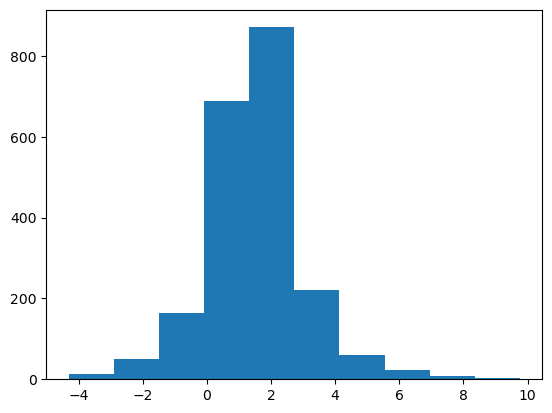

In [7]:
import matplotlib.pyplot as plt

plt.hist(t[:,0])

(array([ 15.,  76., 256., 506., 579., 437., 180.,  40.,   6.,   5.]),
 array([-23.79400652, -17.41160231, -11.02919809,  -4.64679387,
          1.73561034,   8.11801456,  14.50041877,  20.88282299,
         27.26522721,  33.64763142,  40.03003564]),
 <BarContainer object of 10 artists>)

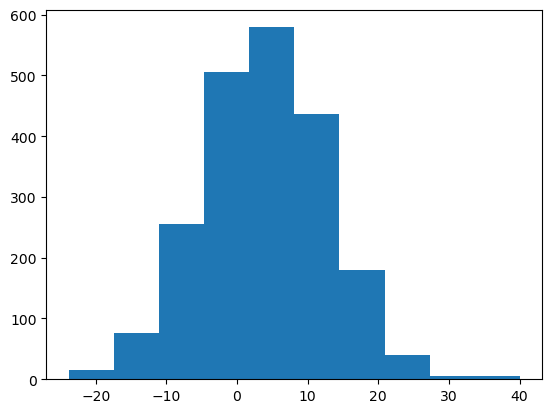

In [10]:
plt.hist(y[:,0])

In [ ]:
x_dim = 100
t_dim = 10
save_path = '/home/zmq/Code/CRNet-kdd/data/simulation_adrf/'+str(t_dim)+'t_'+str(x_dim)+'x'

def simulate_test(test_samples, x_dim, t_dim,  W_I, W_C, W_A, W_T):
    x = np.random.normal(0.0, 1.0, (test_samples,x_dim))

    test_true_ts = np.linspace(0.0,1.0,test_t_nums).reshape(1,-1,1).repeat(test_samples,0).repeat(t_dim,2)
    observed_ts = np.zeros((test_samples*test_t_nums,t_dim))
    xs = np.zeros((test_samples*test_t_nums, x_dim))
    ys = np.zeros((test_samples*test_t_nums,1))
    for i in range(test_t_nums):
        observed_ts[test_samples*i:test_samples*(i+1)] = test_true_ts[:, i,:]
        xs[test_samples*i:test_samples*(i+1),:] = x
        ys[test_samples*i:test_samples*(i+1),:] =  tx2y(test_true_ts[:, i,:], x,W_C,W_A, W_T)

    return observed_ts,xs,ys

if not os.path.exists(save_path):
    os.makedirs(save_path)
for seed in range(30):
    np.random.seed(seed)
    n_samples = 3000
    n_train = 2100
    n_test = 300

    W_I = np.random.uniform(0.5, 1.0, (1, 5))
    W_A = np.random.uniform(0.5, 1.0, (1, 5))
    W_C = np.random.uniform(0.5, 1.0, (1, x_dim-10))
    W_T = np.random.uniform(0.5, 1.0, (1, t_dim))
    t,x,y = simulate_train(n_train, W_I, W_C,W_A, W_T, x_dim, t_dim)
    
    data = np.concatenate((t,x, y.reshape(-1,1)),1)
    np.save(os.path.join(save_path, str(t_dim)+'t_'+str(x_dim)+'x_1y_'+str(n_samples)+'n_'+str(seed)+'seed.npy'), data)

    ts,xs,ys = simulate_adrf(30, 10, x_dim, t_dim, W_I, W_C, W_A,W_T)
    test_data = np.concatenate((ts,xs,ys), axis=1)
    np.save(os.path.join(save_path, str(t_dim)+'t_'+str(x_dim)+'x_1y_'+str(n_samples)+'n_'+str(seed)+'seed_test.npy'), test_data)
